In [3]:
#Import necessary libraries
import pandas as pd
import os
import requests
import numpy as np
import requests
from pprint import pprint
import json
import gmaps
import matplotlib.pyplot as plt
import numpy as np

# Import API key
from api_keys import g_key

In [4]:
# import clean_country_data.csv from file
filename = os.path.join("clean_data_files","clean_data_by_country.csv")
country_data  = pd.read_csv(filename)
del country_data["Unnamed: 0"]
del country_data["JH Confirmed"]
del country_data["JH Recovered"]
country_data.head()

,Country Name,Country Code,2018 GDP ($MM USD),JH Deaths,Area (mi2),Population,Population Density (mi2),Lat,Lng
0,Afghanistan,AFG,19484.0,1436.0,249347.0,31.575018,127.0,33.836449,66.008762
1,Albania,ALB,15147.0,347.0,11082.0,2.862427,258.0,41.142382,20.053634
2,Algeria,DZA,174000.0,1654.0,919595.0,43.000000,47.0,28.148952,2.653180
3,Andorra,AND,3218.0,53.0,179.0,0.076177,425.0,42.542353,1.561301
4,Angola,AGO,101000.0,144.0,481354.0,29.250009,61.0,-12.292289,17.536979


In [5]:
# Formatting and renaming
country_data["JH Deaths/K"] = country_data["JH Deaths"]/1000
country_data["% Total Deaths"] = country_data["JH Deaths"]/country_data["JH Deaths"].sum()
country_data.rename(columns={"Population": "Population (M)"}, inplace=True)
country_data.tail()

,Country Name,Country Code,2018 GDP ($MM USD),JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths/K,% Total Deaths
168,Uzbekistan,UZB,50393.0,413.0,172742.0,32.653900,189.0,41.755474,63.140537,0.413,0.000368
169,Vietnam,VNM,245000.0,35.0,127882.0,96.208984,752.0,16.642823,106.301132,0.035,0.000031
170,Yemen,YEM,27591.0,585.0,175676.0,28.915284,165.0,15.905249,47.590601,0.585,0.000522
171,Zambia,ZMB,27005.0,326.0,290585.0,16.405229,56.0,-13.460131,27.774303,0.326,0.000291
172,Zimbabwe,ZWE,24312.0,224.0,150872.0,15.159624,100.0,-19.002761,29.851646,0.224,0.000200


In [6]:
#Create gmap visualization of COVID deaths by country
# access maps with unique API key
gmaps.configure(api_key=g_key)
locations = country_data[["Lat","Lng"]]
JH_deaths = country_data["JH Deaths"]
#GDP = country_data["2018 GDP ($MM USD"]
# create intial gmap figure
fig = gmaps.figure()
# add heatmap layer
death_layer = gmaps.heatmap_layer(locations, weights=JH_deaths, dissipating=False, max_intensity=1000, point_radius=0.9)
#GDP_layer = gmaps.heatmap_layer(locations, weights=GDP, dissipating=False, max_intensity=1000, point_radius=0.9)
# add heatmap layer to figure
fig.add_layer(death_layer)
#fig.add_layer(GDP_layer)
# Display the figure
fig

Figure(layout=FigureLayout(height='420px'))

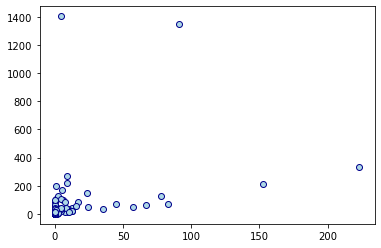

In [7]:
# Correlation JH Deaths to Population
x_data = country_data["JH Deaths/K"]
y_data = country_data["Population (M)"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')

In [8]:
# blah